In [1]:
(19 + 4 ) % 5 + 1

4

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot

df = pd.read_csv('NationalNames.csv')

# 1) Перші 8 рядків набору даних

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Імена стовпців набору даних

In [4]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# 3) Кількість унікальних жіночих та чоловічих імен

In [5]:
male_names = df[df['Gender'] == 'M']['Name'].unique()
female_names = df[df['Gender'] == 'F']['Name'].unique()

data = {'Gender': ['Male', 'Female'], 'Unique Names Count': [len(male_names), len(female_names)]}
gender_names_df = pd.DataFrame(data)

gender_names_df

,Gender,Unique Names Count
0,Male,39199
1,Female,64911


# 6) 5 найпопулярніших чоловічих імен у 2010 році

In [6]:
filtered_df = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]
sorted_df = filtered_df.sort_values(by='Count', ascending=False)

top_5_male_names = sorted_df.head(5)['Name'].tolist()

top_5_male_names

['Jacob', 'Ethan', 'Michael', 'Jayden', 'William']

# 7) Найпопулярніше ім’я

In [7]:
most_popular_name_entry = df.loc[df['Count'].idxmax()]
most_popular_name = most_popular_name_entry['Name']
most_popular_year = most_popular_name_entry['Year']

most_popular_name,most_popular_year

('Linda', 1947)

# 8) Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [8]:
df_2008 = df[df['Year'] == 2008]

df_2008.loc[df_2008['Count'].idxmax()]['Name']

'Jacob'

# 12) Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [9]:
df_jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

pd.DataFrame(df_jacob_female.loc[df_jacob_female['Count'].idxmax()])

,1455556
Id,1455557
Name,Jacob
Year,2004
Gender,F
Count,171


# 13) Рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [10]:
gender_neutral_names_by_year = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names_by_year = gender_neutral_names_by_year[gender_neutral_names_by_year == 2].groupby('Year').count()

pd.DataFrame({
    'Year': [gender_neutral_names_by_year.idxmax()],
    'Number of names': [gender_neutral_names_by_year.max()]
})

,Year,Number of names
0,2008,2557


# 14) Загальна кількість народжень за рік

In [11]:
pd.DataFrame(df.groupby('Year')['Count'].sum())

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


# 15) Рік, коли народилося найбільше дітей

In [12]:
df.groupby('Year')['Count'].sum().idxmax()

1957

# 16) Кількість дівчаток та хлопчиків, які народились кожного року

In [13]:
births_by_gender_and_year = df.groupby(['Year', 'Gender'])['Count'].sum()

births_by_gender_and_year.unstack()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


# 17) Графік загальної кількості народжень хлопчиків та дівчаток на рік.

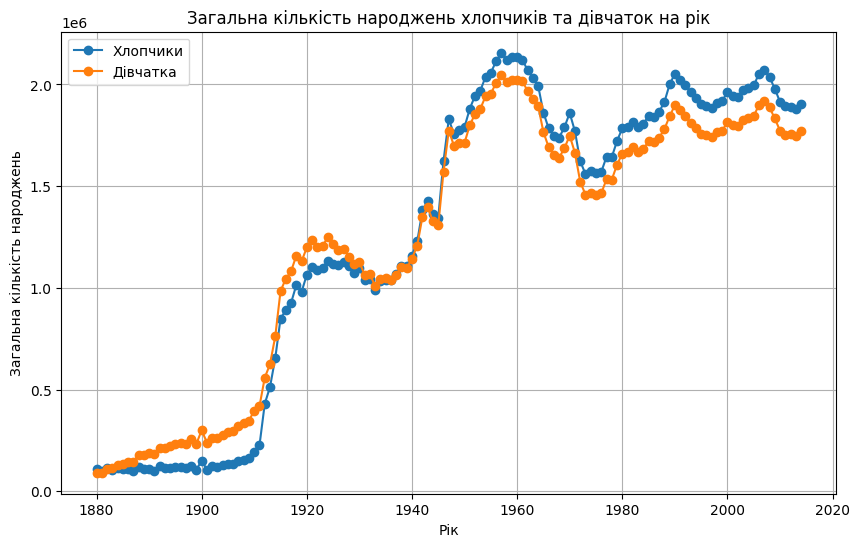

In [14]:
total_births_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

pyplot.figure(figsize=(10, 6))

pyplot.plot(total_births_by_year['M'], label='Хлопчики', marker='o')
pyplot.plot(total_births_by_year['F'], label='Дівчатка', marker='o')

pyplot.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
pyplot.xlabel('Рік')
pyplot.ylabel('Загальна кількість народжень')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

# 19) Кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [15]:
gender_neutral_names = df.groupby('Name')['Gender'].nunique().reset_index()

neutral_names = gender_neutral_names[gender_neutral_names['Gender'] == 2]

count_neutral_names = len(neutral_names)
count_neutral_names

10221

# 22) Скільки років проводилось спостереження

In [16]:
df['Year'].max() - df['Year'].min() + 1

135

# 24) Найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [17]:
min_count = df['Count'].min()
sorted_table = df.sort_values(by='Count')
filtered_table = sorted_table[sorted_table['Count'] == min_count]
name_counts = filtered_table['Name'].value_counts()

most_frequent_name_in_filtered_table = name_counts.idxmax()
name_grouped = filtered_table.groupby('Name')['Count'].sum()
count_for_most_frequent_name = name_grouped.get(most_frequent_name_in_filtered_table, 0)

print(f"The count for the most frequent name '{most_frequent_name_in_filtered_table}' is {count_for_most_frequent_name}.")

The count for the most frequent name 'Celester' is 160.


# 25) Графіки розподілення кількості імен John та Mary по роках без залежності до статі.

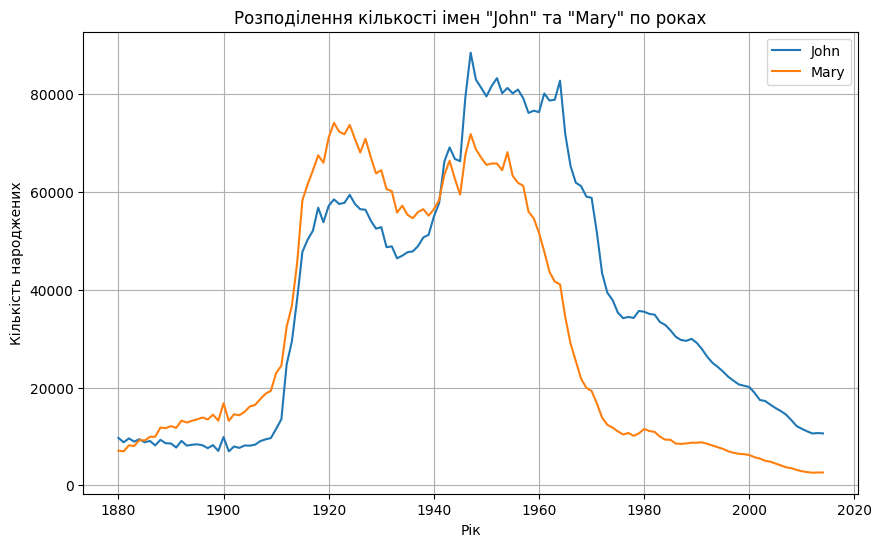

In [18]:
john_data = df[df['Name'] == 'John']
mary_data = df[df['Name'] == 'Mary']

john_counts_by_year = john_data.groupby('Year')['Count'].sum()
mary_counts_by_year = mary_data.groupby('Year')['Count'].sum()

pyplot.figure(figsize=(10, 6))

pyplot.plot(john_counts_by_year.index, john_counts_by_year, label='John')
pyplot.plot(mary_counts_by_year.index, mary_counts_by_year, label='Mary')

pyplot.title('Розподілення кількості імен "John" та "Mary" по роках')
pyplot.xlabel('Рік')
pyplot.ylabel('Кількість народжених')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

# 26) Графік розподілення кількості жіночих імен John та чоловічих імен Mary по роках

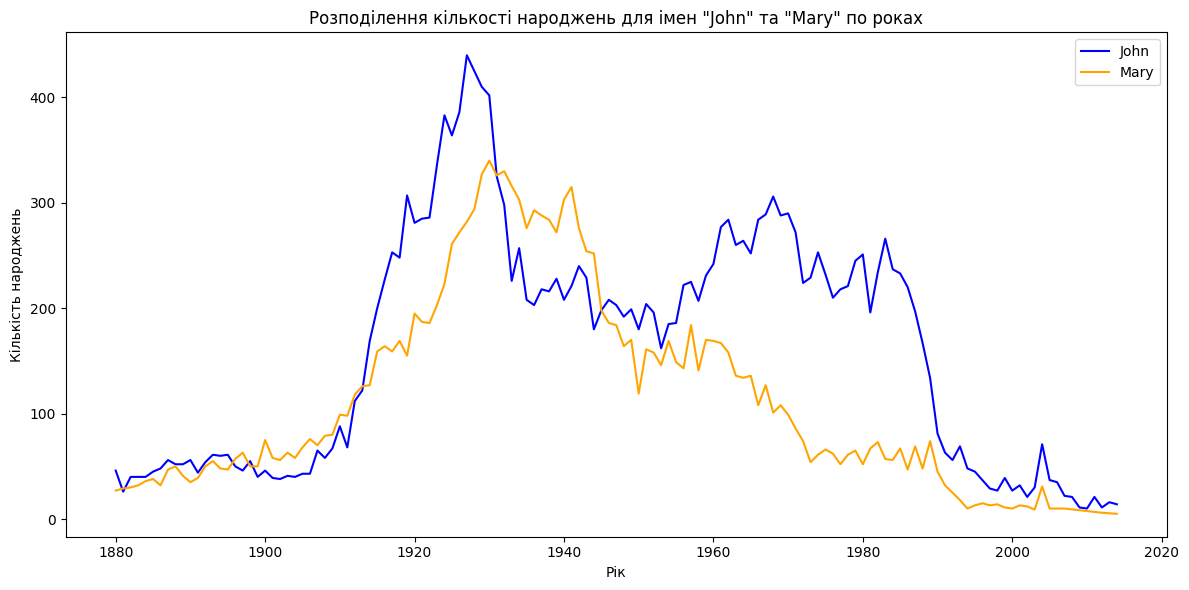

In [19]:
def John_and_Mary_plot():
    john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
    mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

    john_by_year = john_data.groupby('Year')['Count'].sum()
    mary_by_year = mary_data.groupby('Year')['Count'].sum()
    pyplot.figure(figsize=(12, 6))
    pyplot.plot(john_by_year.index, john_by_year.values, label='John', color='blue')
    pyplot.plot(mary_by_year.index, mary_by_year.values, label='Mary', color='orange')
    pyplot.title('Розподілення кількості народжень для імен "John" та "Mary" по роках')
    pyplot.xlabel('Рік')
    pyplot.ylabel('Кількість народжень')
    pyplot.legend()
    pyplot.tight_layout()
    pyplot.savefig("John_and_Mary.png")
    pyplot.show()
John_and_Mary_plot()

# 27) Найпопулярніші імена в кожному році.

In [20]:
df.loc[df.groupby('Year')['Count'].idxmax()]

,Id,Name,Year,Gender,Count
942,943,John,1880,M,9655
2938,2939,John,1881,M,8769
4963,4964,John,1882,M,9557
7116,7117,John,1883,M,8894
9318,9319,John,1884,M,9388
...,...,...,...,...,...
1657592,1657593,Isabella,2010,F,22883
1691633,1691634,Sophia,2011,F,21816
1725502,1725503,Sophia,2012,F,22267
1759186,1759187,Sophia,2013,F,21147
